# Análise de dados de uma DB de clientes de um banco

## Descrição

<p>Nesta análise, investigaremos o comportamento dos clientes de um banco segundo sua adimplencia ou inadimplência, sendo eles representados no banco de dados pela coluna dafault onde 0 representa os cliente adimplentes e 1 os inadimplente.
<p>Através dessa investigação, tentaremos entender a situação dos clientes inadimplentes para que possamos torná-lô adimplente novamente, também tentaremos constatar quais comportamentos podem indicar uma futura inadimplência por parte de um cliente adimplente, além de tentar indicar quais são os perfis de clientes que menos são ou serão inadimplentes.

## Importações

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Download e carregamento da DB

In [3]:
df = pd.read_csv("./Python_M10_support material.csv", na_values='na')
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


## Filtrando a DB

In [6]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f"Total: {qtd_total}, Adimplentes: {qtd_adimplentes}, Inadimplentes: {qtd_inadimplentes}")
print(
    f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(
    f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

Total: 10127, Adimplentes: 8500, Inadimplentes: 1627
A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


## Schema / Observação dos formatos e tipos de dados
- Visualização geral dos tipos de dados segundo a coluna
- Seleção por atributos categoricos e numéricos respectivamente

### Visualização dos tipos de dados

In [88]:
tipos_de_dados = df.dtypes
print(tipos_de_dados)

categorico = df.select_dtypes('object').describe().transpose()
print(categorico)

numerico = df.drop('id', axis=1).select_dtypes('number').describe().transpose()
print(numerico)

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object
                      count unique             top  freq
sexo                  10127      2               F  5358
escolaridade           8608      5        mestrado  3128
estado_civil           9378      3          casado  4687
salario_anual          9015      5  menos que $40K  3561
tipo_cartao           10127      4            blue  9436
limite_credito        10127   9272        1.438,21    11
valor_transacoes_12m  10127  10035        3

### Problemas visualizados a partir da análise do Schema
- A partir dessa observação concluimos que existe a necessidade de tratamento dessa DB
- Ela possue incongruencias na tipificação dos dados, limite_credito e valor_transacoes_12m, ambos estão como objects embora devessem ser floats
- Além disso, a DB possui dados faltantes (escolaridade, estado_civil, salario_anual).

## Observação e limpeza dos dados
- Resolver os problemas observados no Schema

### Dados faltantes

##### Verificando colunas com dados faltantes

In [89]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

##### Método que verifica:
- Quais linha possuem dados faltantes
- A quantidade deles dentro da linha
- A porcentagem deles em relação ao total

In [90]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    
    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {
                col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
            stats_dados_faltantes.append(dict_dados_faltantes)

    for stat in stats_dados_faltantes:
        print(f'{stat}')

##### Utilizando o método para:
- Todos os clientes
- Somente os adimplentes (default = 0)
- Somente os inadimplentes (default = 1)

In [91]:
print(f'Dados faltante total:')
stats_dados_faltantes(df=df)
print("\n\n")

print(f'Dados faltante adimplentes:')
stats_dados_faltantes(df=df[df['default'] == 0])
print("\n\n")

print(f'Dados faltante inadimplentes:')
stats_dados_faltantes(df=df[df['default'] == 1])

Dados faltante total:
{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}



Dados faltante adimplentes:
{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}



Dados faltante inadimplentes:
{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


#### Remoção dos dados faltantes

In [92]:
df.dropna(inplace=True)

### Dados tipificados erroneamente

#### Criação e teste de um método de limpeza genérico

In [93]:
fn_limpeza = lambda valor: float(valor.replace(".", "").replace(",", "."))
valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn_limpeza, valores_originais))

print(valores_originais)
print(f'{valores_limpos}')

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


#### Método na lista

In [94]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
df['limite_credito'] = df['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

#### Conferindo se os dados foram alterados
- Verificação via tipo - valor_transacoes_12m e limite_credito passam a ser float64 e não mais objects
- Verificação via atributo - valor_transacoes_12m e limite_credito passam a ser atributos numéricos e não mais categóricos

In [95]:
print(f'{df.dtypes}\n\n')

print(f"{df.select_dtypes('object').describe().transpose()}\n\n")

print(f"{df.drop('id', axis=1).select_dtypes('number').describe().transpose()}\n\n")

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object


              count unique             top  freq
sexo           7081      2               M  3706
escolaridade   7081      5        mestrado  2591
estado_civil   7081      3          casado  3564
salario_anual  7081      5  menos que $40K  2792
tipo_cartao    7081      4            blue  6598


                          count         mean          std      min      25%  \
default                  7081.0     0.157181     

### Verificação dos dados após a limpeza

In [96]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A antiga proporcão clientes adimplentes era de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão clientes adimplentes após a limpeza dos dados é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%\n")

print(f"A antiga proporcão clientes inadimplentes era de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão clientes inadimplentes após a limpeza dos dados é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%\n\n")

A antiga proporcão clientes adimplentes era de 83.93%
A nova proporcão clientes adimplentes após a limpeza dos dados é de 84.28%

A antiga proporcão clientes inadimplentes era de 16.07%
A nova proporcão clientes inadimplentes após a limpeza dos dados é de 15.72%




## Visualização dos Dados
- Criação de gráficos para análise

In [97]:
sns.set_style("darkgrid")

### Separando os dados para cada tipo de cliente segundo sua adimplência

In [98]:
df_adimplente = df[df['default'] == 0]

df_inadimplente = df[df['default'] == 1]

### Variáveis categóricas
- Nesse caso não podemos utilizar variaves sensíveis protegidas pela LGPD, logo não utilizaremos a variável sexo para essa análise
- Criar 3 gráficos para analisar a variaveis segundo o total dos cliente, os cliente adimplentes e os inadimplentes


In [99]:
df.select_dtypes('object').head()

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


#### Análise da escolaridade

##### Obtenção dos gráficos

C:\Users\gabri\AppData\Local\Temp\ipykernel_19332\3423702270.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


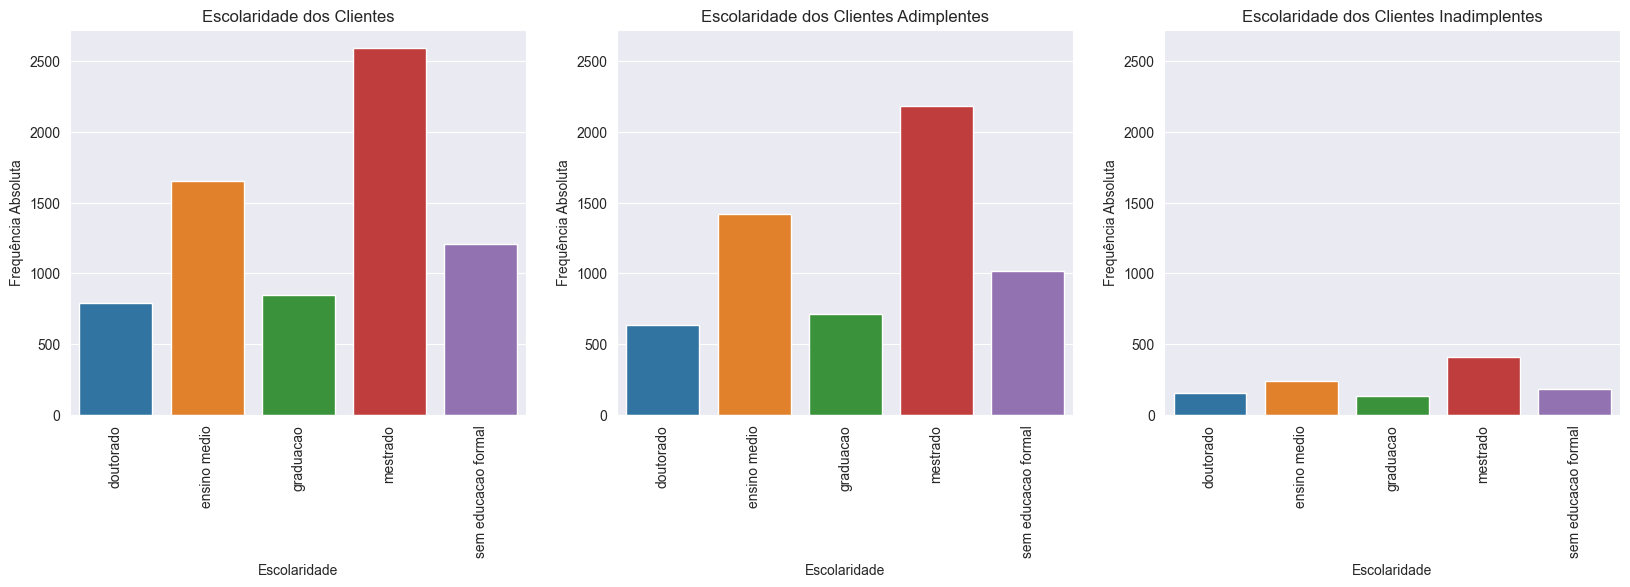

In [100]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

##### Análise
- Os gráficos possuem uma estrutura muito similar e proporcional
- Ocorre uma pequena inversão de proporção no gráfico de inadimplentes nas colunas de doutorado e graduação aonde o número de clientes doutores torna-se superior aos de graduados
- A inversão observada não significa uma variação muito grande e de modo geral os gráficos são extremamente propocionais
- Dessa forma concluimos que a variável escolaridade não explica o porquê dos clientes serem adimplentes ou inadimplentes

#### Análise do Estado Civil

##### Obtenção dos gráficos

C:\Users\gabri\AppData\Local\Temp\ipykernel_19332\2596976725.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


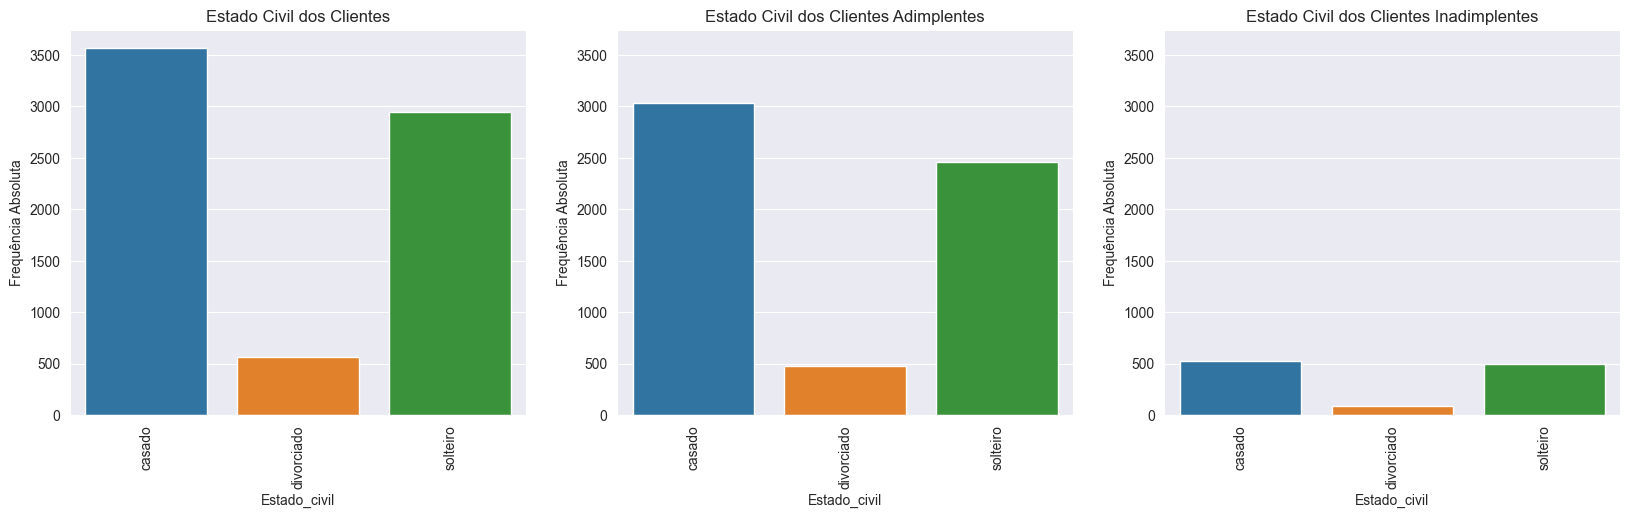

In [101]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

##### Análise
- Os gráficos são completamente simétricos
- Logo, assim como no caso da escolaridade, podemos discartar o Estado Civil dos Clientes como um fator de adimplência ou inadimplência

#### Análise do Salário Anual dos clientes

##### Obtenção dos gráficos

C:\Users\gabri\AppData\Local\Temp\ipykernel_19332\2272463181.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


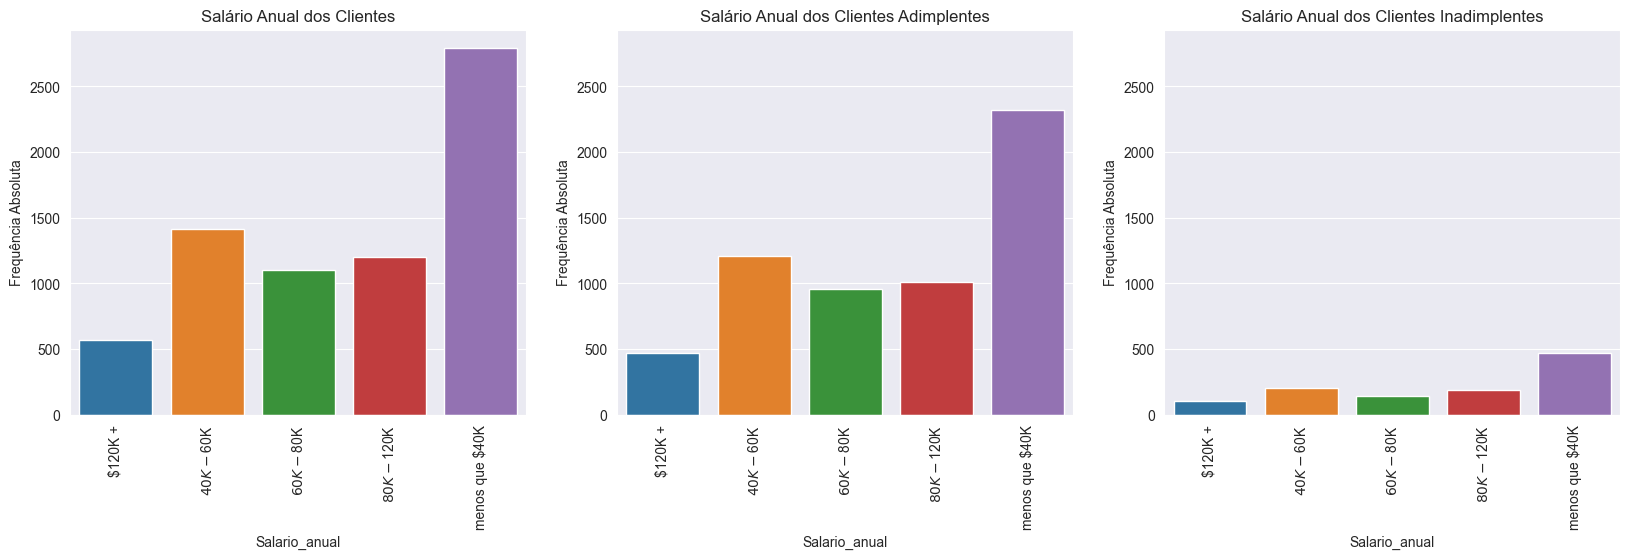

In [102]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=[coluna], inplace=True)
  df_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

##### Análise
- Ambos os gráficos são proporcionais
- Quanto maior a faixa de salário anual menor é a quantidade de clientes
- Quanto maior a faixa de salário a taxa de clientes é proporcionalmente menor
- Também não é uma boa variável para averiguar o fator de adimplência ou inadimplência

#### Análise geral
- Em geral, as variáveis categóricas não ajudam a definir o fator de adimplência ou inadimplência dos clientes

### Variáveis numéricas 

In [103]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head()

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


#### Análise da Quantidade de Transações

##### Obtenção dos gráficos

C:\Users\gabri\AppData\Local\Temp\ipykernel_19332\3045762736.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


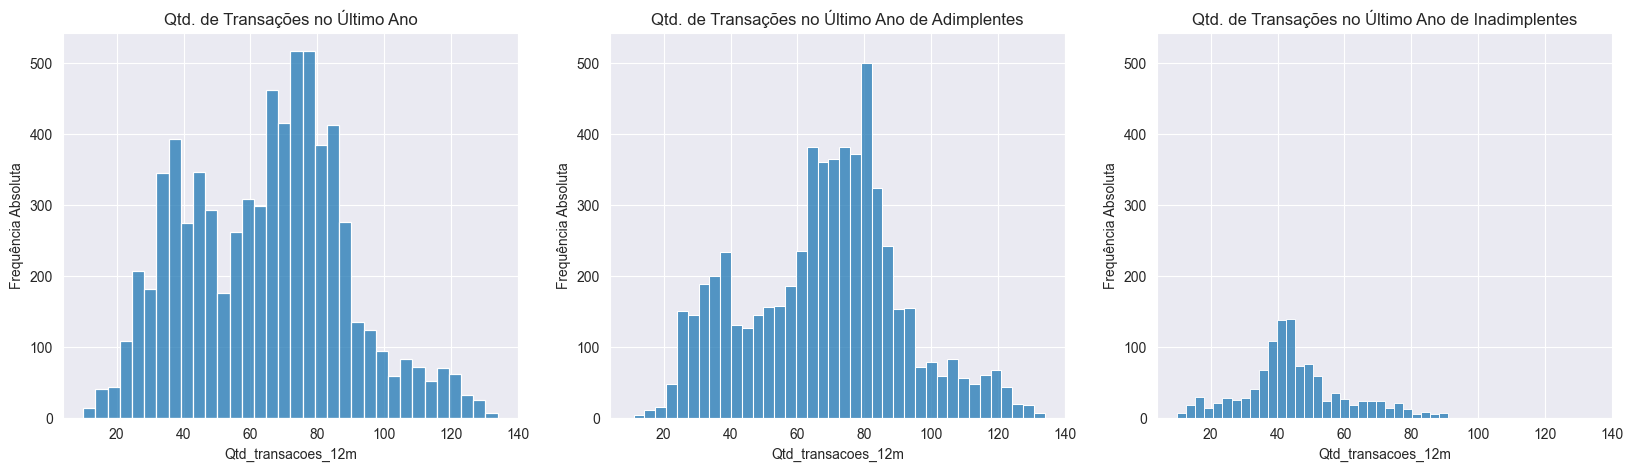

In [104]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

##### Análise
- De modo geral os clientes fazem em torno de 80 transações por ano
- Os cliente adimplêntes fazem muito mais transações que os inaadimplêntes
- O gráfico geral tem um pico na faixa das 40 transações anuais que é criado justamente pelos clientes inadimplêntes
- Dessa forma, aconselha-se o acompanhamento dos cliente dentro dessa faixa, pois pode significar uma possível inadimplência futura e tentar impedir que isso aconteça

#### Análise do Valor das Transações

##### Obtenção dos Gráficos

C:\Users\gabri\AppData\Local\Temp\ipykernel_19332\3932491844.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


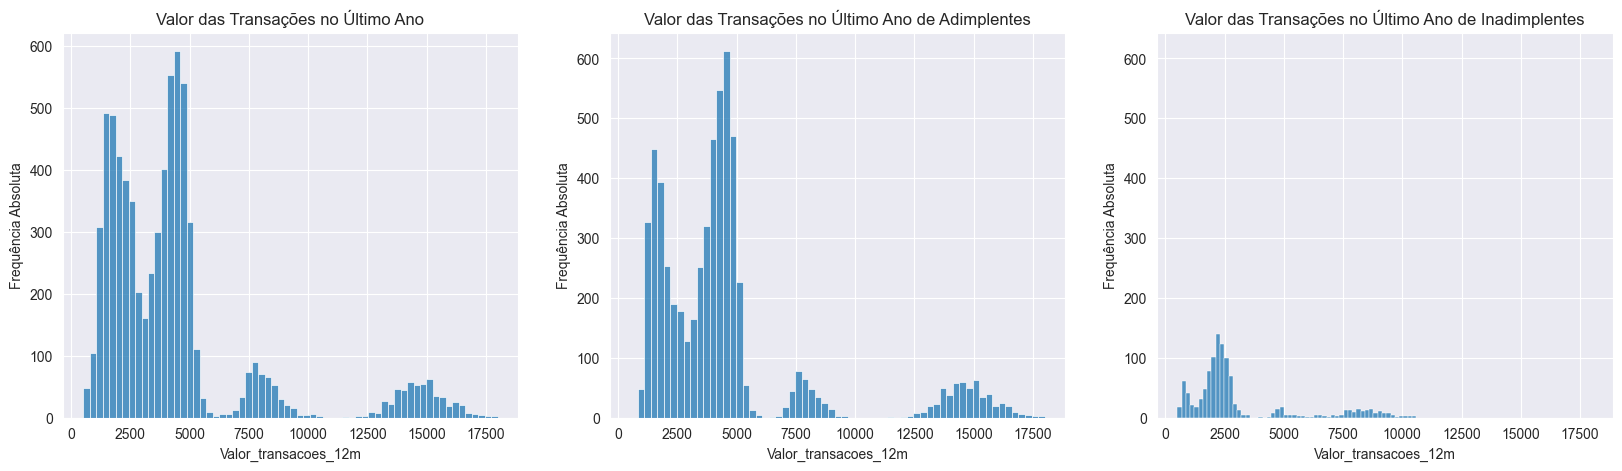

In [105]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

##### Análise
- De modo geral, valor das transções estão concentradas na faixa de 1k - 5k
- Os picos na faixa de 7.5k - 10k e 12.5k - 17.5k são gerados quase que exclusivamente pelos clientes adimplêntes
- O valores dos clientes adimplentes flutuam de modo geral entre 500 - 1k e 3k - 7k
- Enquanto isso, os clientes inadimplêntes possuem transações concentradas em 2.5k
- Dessa forma, aconselha-se o acompanhamento dos clientes que começarem a fazer muitas transações dentro da faixa dos 2.5k, pois indica um risco de endividamento

#### Análise correlativa das variáveis Quantidade de Transações e Valor das Transações

##### Obtenção dos gráficos

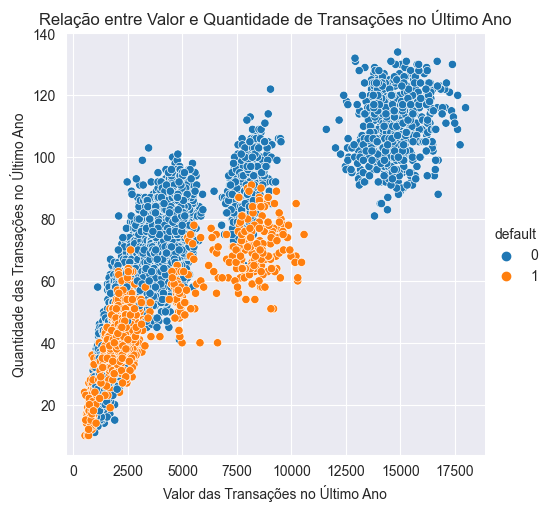

In [106]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

##### Análise
- Existem 3 concentrações de clientes: muitas transações com valores baixos, muitas transações com valores medianos e muitas transações com valores altos
- No 1° caso é onde estão concentrados um maior número de clientes na qual quanto menor o número de transações e menor os valores das transações maior é a quantidade de cliente inadimplêntes
- No 2° caso existe uma distribuição quase que simétrica de cliente adimplêntes e inadimplêntes
- No 3° caso não existem clientes inadimplêntes
- Clientes inadimplêntes não fazem transações com valores superiores a 11k
- Recomenda-se atenção para com as pessoas que tenham uma quantidade mediana de transações com valores entre 7k - 10k e uma quantidade de transações alta com valores baixos (até 2.5k), pois de modo geral é onde se concentra uma maior quantidade de clientes inadimplêntes.

#### Análise geral
- Devemos ficar atentos principalmente no número de transações e no valor que elas acontecem.
- Esses 2 dados expõem uma grande probabilidade dos clientes se tornarem inadimplêntes